In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img

In [9]:
from keras import models
from keras import layers
from keras import optimizers

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [11]:
from keras.callbacks import EarlyStopping

In [12]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [13]:
base_dir = 'data/categories_castle'
no_cats = 30

In [14]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 1

In [15]:
def extract_features(directory, sample_count, no_cats):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, no_cats))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return generator, features, labels

In [16]:
train_generator, train_features, train_labels = extract_features(train_dir, no_cats, no_cats)

Found 30 images belonging to 30 classes.


In [17]:
val_generator, validation_features, validation_labels = extract_features(validation_dir, no_cats, no_cats)

Found 30 images belonging to 30 classes.


In [18]:
val_class_indices = val_generator.__dict__['class_indices']

In [19]:
train_features = np.reshape(train_features, (no_cats, 4*4* 512))
validation_features = np.reshape(validation_features, (no_cats, 4*4* 512))

In [20]:
# del model

In [21]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(Dense(no_cats, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                7710      
Total params: 2,105,118
Trainable params: 2,105,118
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [23]:
history = model.fit(train_features, train_labels,
                    epochs=300,
                    batch_size=5,
                    validation_data=(validation_features, validation_labels),
                    callbacks=[es])

Train on 30 samples, validate on 30 samples
Epoch 1/300
30/30 [==============================] - 0s 9ms/step - loss: 4.2452 - acc: 0.0000e+00 - val_loss: 3.7380 - val_acc: 0.0333
Epoch 2/300
30/30 [==============================] - 0s 4ms/step - loss: 4.0718 - acc: 0.0667 - val_loss: 3.6739 - val_acc: 0.0333
Epoch 3/300
30/30 [==============================] - 0s 4ms/step - loss: 3.6342 - acc: 0.1333 - val_loss: 3.6202 - val_acc: 0.0333
Epoch 4/300
30/30 [==============================] - 0s 4ms/step - loss: 3.5537 - acc: 0.0667 - val_loss: 3.5723 - val_acc: 0.0667
Epoch 5/300
30/30 [==============================] - 0s 4ms/step - loss: 3.5718 - acc: 0.0333 - val_loss: 3.5271 - val_acc: 0.0667
Epoch 6/300
30/30 [==============================] - 0s 4ms/step - loss: 3.4406 - acc: 0.0667 - val_loss: 3.4892 - val_acc: 0.1000
Epoch 7/300
30/30 [==============================] - 0s 4ms/step - loss: 3.5769 - acc: 0.0333 - val_loss: 3.4514 - val_acc: 0.1000
Epoch 8/300
30/30 [================

Epoch 63/300
30/30 [==============================] - 0s 4ms/step - loss: 0.9133 - acc: 1.0000 - val_loss: 2.3073 - val_acc: 0.5333
Epoch 64/300
30/30 [==============================] - 0s 4ms/step - loss: 0.9513 - acc: 0.9333 - val_loss: 2.2920 - val_acc: 0.5000
Epoch 65/300
30/30 [==============================] - 0s 4ms/step - loss: 0.8540 - acc: 0.9667 - val_loss: 2.2774 - val_acc: 0.5333
Epoch 66/300
30/30 [==============================] - 0s 4ms/step - loss: 0.7099 - acc: 0.9667 - val_loss: 2.2596 - val_acc: 0.5000
Epoch 67/300
30/30 [==============================] - 0s 4ms/step - loss: 0.7363 - acc: 1.0000 - val_loss: 2.2480 - val_acc: 0.5333
Epoch 68/300
30/30 [==============================] - 0s 4ms/step - loss: 0.5896 - acc: 1.0000 - val_loss: 2.2366 - val_acc: 0.5333
Epoch 69/300
30/30 [==============================] - 0s 4ms/step - loss: 0.7262 - acc: 0.9667 - val_loss: 2.2162 - val_acc: 0.5000
Epoch 70/300
30/30 [==============================] - 0s 4ms/step - loss: 0.

Epoch 125/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1417 - acc: 1.0000 - val_loss: 1.6562 - val_acc: 0.6667
Epoch 126/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1740 - acc: 1.0000 - val_loss: 1.6482 - val_acc: 0.7000
Epoch 127/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1664 - acc: 1.0000 - val_loss: 1.6326 - val_acc: 0.7000
Epoch 128/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1623 - acc: 1.0000 - val_loss: 1.6258 - val_acc: 0.7000
Epoch 129/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1617 - acc: 1.0000 - val_loss: 1.6181 - val_acc: 0.7333
Epoch 130/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1364 - acc: 1.0000 - val_loss: 1.6084 - val_acc: 0.7000
Epoch 131/300
30/30 [==============================] - 0s 4ms/step - loss: 0.1718 - acc: 1.0000 - val_loss: 1.6009 - val_acc: 0.7000
Epoch 132/300
30/30 [==============================] - 0s 4ms/step - 

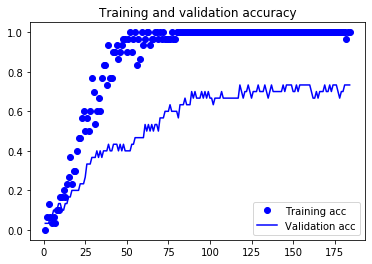

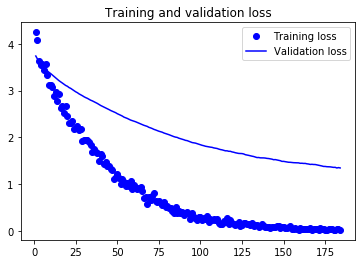

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
model.save('castle_30_vgg_features_balanced_from_compressed.h5')

Checking predictions

In [26]:
# model = load_model('yonder_38_vgg_features.h5')

In [27]:
pred_probs = model.predict(validation_features)

In [28]:
preds = {'first': [], 'second': []}
for i in pred_probs:
    indices = i.argsort()[-3:][::-1]
    preds['first'].append(indices[0])
    preds['second'].append(indices[1])

In [29]:
labels = []
for i in validation_labels:
    labels.append(np.argmax(i))

In [30]:
preds

{'first': [25,
  24,
  15,
  7,
  8,
  28,
  20,
  12,
  16,
  28,
  6,
  2,
  10,
  1,
  5,
  23,
  9,
  29,
  11,
  5,
  21,
  29,
  10,
  22,
  13,
  7,
  27,
  12,
  15,
  0],
 'second': [29,
  15,
  22,
  3,
  12,
  29,
  15,
  13,
  22,
  13,
  29,
  29,
  3,
  29,
  28,
  11,
  1,
  24,
  22,
  18,
  3,
  1,
  0,
  24,
  28,
  3,
  15,
  20,
  14,
  28]}

In [31]:
labels

[25,
 24,
 18,
 3,
 8,
 4,
 20,
 12,
 16,
 28,
 6,
 2,
 10,
 1,
 5,
 23,
 9,
 26,
 11,
 17,
 21,
 29,
 19,
 22,
 13,
 7,
 27,
 15,
 14,
 0]

In [32]:
pred_probs[10]

array([1.8955448e-03, 9.8568806e-04, 2.2844030e-03, 3.9965739e-03,
       2.5828709e-04, 1.9045779e-03, 9.5573449e-01, 2.3369884e-04,
       1.1580571e-03, 3.6033848e-04, 4.6056116e-04, 5.2146678e-04,
       6.9309771e-04, 9.6805725e-04, 7.6967018e-04, 1.7847791e-03,
       4.8341486e-04, 4.0979023e-04, 5.2606693e-04, 7.5791572e-04,
       2.1901508e-03, 6.3022313e-04, 4.7658218e-04, 2.7916310e-04,
       3.9080536e-04, 9.9371222e-04, 1.2660288e-04, 2.5092261e-03,
       1.2171501e-03, 1.4999851e-02], dtype=float32)

In [33]:
# diffs = [a_i - b_i for a_i, b_i in zip(preds['first'], labels)]

In [34]:
val_class_indices_opp = {v:k for k, v in val_class_indices.items()}

In [35]:
def get_pred_cat(cat, rank):
    category_index_model = val_class_indices[str(cat)]
#     print('category_index_model: ', category_index_model)
    index_in_labels = labels.index(category_index_model)
#     print('index_in_labels: ', index_in_labels)
#     diff_val = diffs[index_in_labels]
#     print('diff: ', diff_val)
    pred = preds[rank][index_in_labels]
    pred_category = val_class_indices_opp[pred]
    return int(pred_category)
#     print('pred_category: ', pred_category)
    # would like to know the probability here - could then calibrate

In [36]:
def get_filenames(mypath):
    onlyfiles = [f for f in os.listdir(mypath) if not f.startswith('.')]
    return onlyfiles

In [37]:
def get_photo(category, number, group):
    if group=='test':
        category_paths = [f'{base_dir}/test/{i}/' for i in range(1, 100)]
        test_img = os.path.join(category_paths[category-1], get_filenames(category_paths[category-1])[number-1])
        img = load_img(test_img)
    elif group=='train':
        category_paths = [f'{base_dir}/train/{i}/' for i in range(1, 100)]
        test_img = os.path.join(category_paths[category-1], get_filenames(category_paths[category-1])[number-1])
        img = load_img(test_img)        
    return img

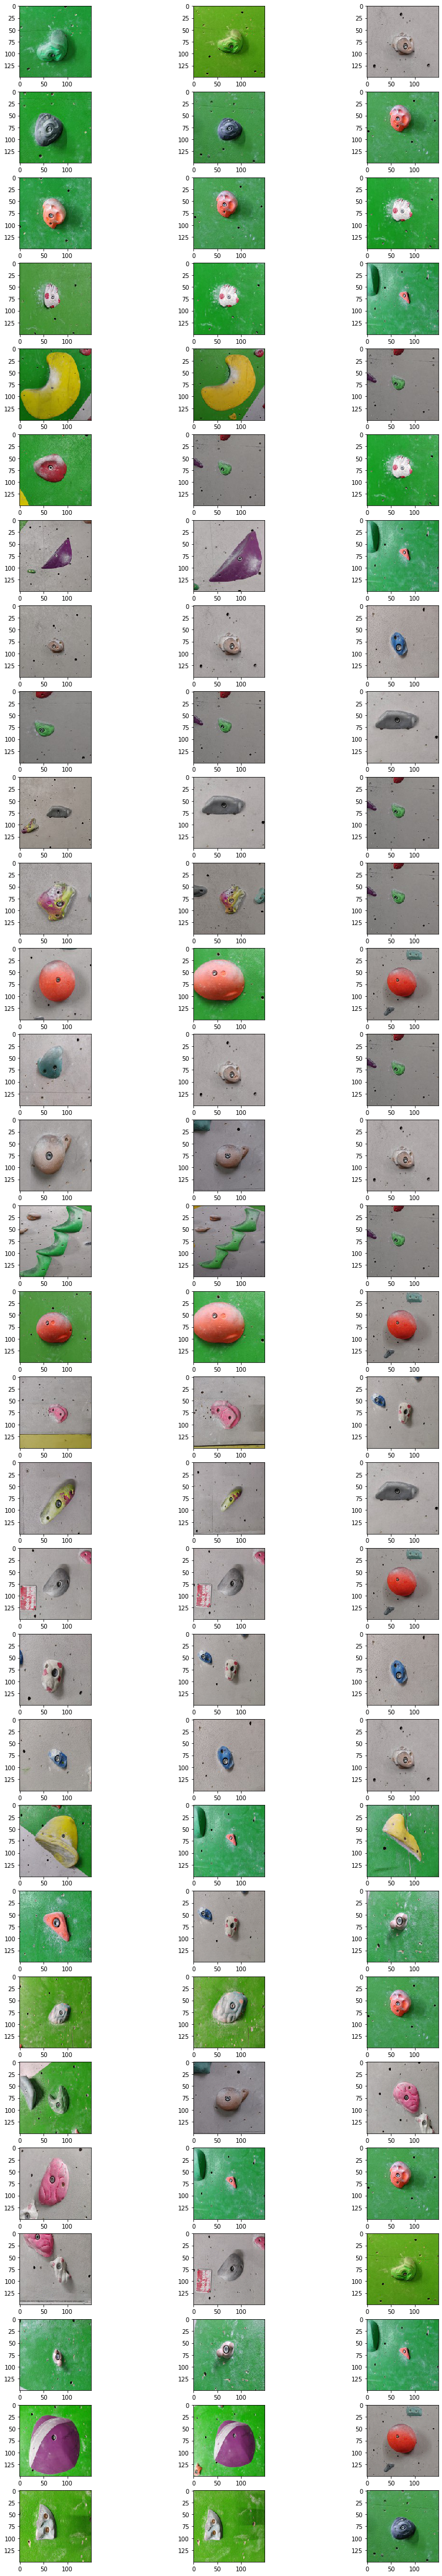

In [38]:
fig, ax = plt.subplots(no_cats, 3, figsize=(15,80))
for i in range(0, no_cats):
    ax[i, 0].imshow(get_photo(i+1, 1, 'train'))
    ax[i, 1].imshow(get_photo((get_pred_cat(i+1, 'first')), 1, 'test'))
    ax[i, 2].imshow(get_photo((get_pred_cat(i+1, 'second')), 1, 'test'))